In [2]:
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
import pandas as pd

[0, 1, 2, 3, 4, 5, 6]
['1', 1, 'second', 2, 3, 'node4', 0, 4, 5, 6]
['1', 1, 'second', 2, 3, 'node4', 0, 4, 5, 6, <networkx.classes.graph.Graph object at 0x119550550>]


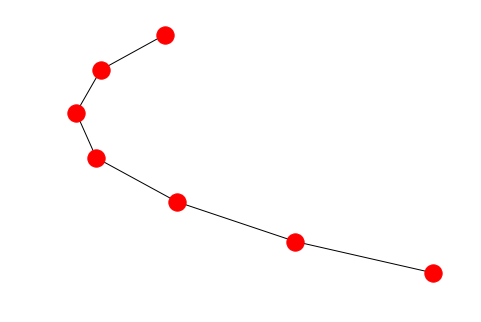

In [7]:
# Quick cheat sheet

# Create an empty graph object with no nodes and edges.
G = nx.Graph() # DiGraph, MultiGraph, MultiDiGraph

## Add nodes to our graph object
# In NetworkX, nodes can be any hashable object e.g. a text string, an image,
# an XML object, another Graph, a customized node object, etc.

G.add_node('1')
G.add_node(1)
G.add_node('second')

# These would not work because they're not hashable
# G.add_node({'dictionary': 'will throw error'})
# G.add_node([1, 2])

list_of_nodes = [1, 2, 3, 'node4']
G.add_nodes_from(list_of_nodes)

# Access nodes in a Graph object
G.nodes()

# NetworkX has a lot of graph generators path_graph is one of them.
H = nx.path_graph(7)
print(H.nodes())
nx.draw(H)

G.add_nodes_from(H)
print(G.nodes())

G.add_node(H)
print(G.nodes())

##### First way to visualize: Draw Network

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 9), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (1, 7), (1, 8), (1, 9), (2, 3), (2, 4), (2, 5), (2, 6), (2, 7), (2, 8), (2, 9), (3, 4), (3, 5), (3, 6), (3, 7), (3, 8), (3, 9), (4, 5), (4, 6), (4, 7), (4, 8), (4, 9), (5, 6), (5, 7), (5, 8), (5, 9), (6, 7), (6, 8), (6, 9), (7, 8), (7, 9), (8, 9)]


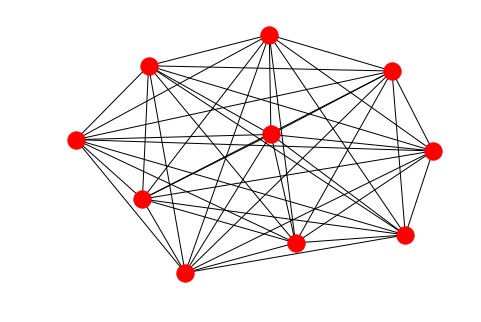

In [13]:
# One more graph generator
G = nx.erdos_renyi_graph(10, 10, seed=1)
# Let's checkout nodes and edges
print(G.nodes())
print(G.edges())

nx.draw(G)

##### Second way to visualize: Matplotlib

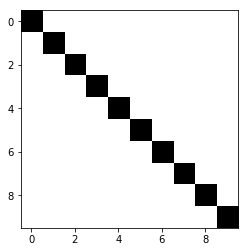

In [12]:
matrix = nx.to_numpy_matrix(G)

# print matrix

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.set_aspect('equal')
plt.imshow(matrix, interpolation='nearest', cmap=plt.cm.gray)
plt.show()


-----
### Adding Attributes & Weights

In [15]:
# Now let's talk about edges.
# Edge between two nodes means that they share some property/relationship

G.add_edge(1, 2, weight=4.7)

G.add_edges_from([(3, 4), (4, 5)], color='red')

G.add_edges_from([(1, 2, {'color': 'blue'}), (2, 3, {'weight': 8})])

G[1][2]['weight'] = 4.7

G.add_node(1, time='13:00')
print(G.nodes())
print(G.nodes(data=True))

# Accessing the graph dictionary
print('nodes: ', G.nodes())
print('edges: ', G.edges(data=True))

print(G[1])
print(G[1][2])
print(G[1][2]['color'])

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[(0, {}), (1, {'time': '13:00'}), (2, {}), (3, {}), (4, {}), (5, {}), (6, {}), (7, {}), (8, {}), (9, {})]
nodes:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
edges:  [(0, 1, {}), (0, 2, {}), (0, 3, {}), (0, 4, {}), (0, 5, {}), (0, 6, {}), (0, 7, {}), (0, 8, {}), (0, 9, {}), (1, 2, {'weight': 4.7, 'color': 'blue'}), (1, 3, {}), (1, 4, {}), (1, 5, {}), (1, 6, {}), (1, 7, {}), (1, 8, {}), (1, 9, {}), (2, 3, {'weight': 8}), (2, 4, {}), (2, 5, {}), (2, 6, {}), (2, 7, {}), (2, 8, {}), (2, 9, {}), (3, 4, {'color': 'red'}), (3, 5, {}), (3, 6, {}), (3, 7, {}), (3, 8, {}), (3, 9, {}), (4, 5, {'color': 'red'}), (4, 6, {}), (4, 7, {}), (4, 8, {}), (4, 9, {}), (5, 6, {}), (5, 7, {}), (5, 8, {}), (5, 9, {}), (6, 7, {}), (6, 8, {}), (6, 9, {}), (7, 8, {}), (7, 9, {}), (8, 9, {})]
{0: {}, 2: {'weight': 4.7, 'color': 'blue'}, 3: {}, 4: {}, 5: {}, 6: {}, 7: {}, 8: {}, 9: {}}
{'weight': 4.7, 'color': 'blue'}
blue


7 7 7
5 5
[0, 'second', 2, 3, 'node4', 4, 5]
['second', 2, 3, 'node4', 4, 5]
[('second', 'node4'), (2, 3), (4, 5)]
[('second', 'node4'), (2, 3)]
[] []


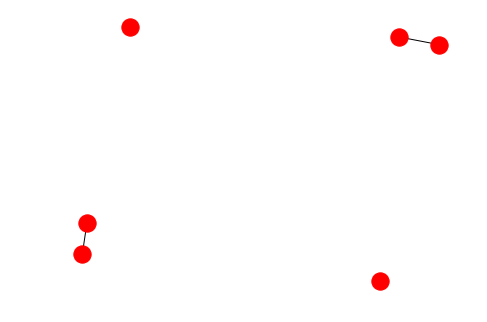

In [10]:
# Now let's talk about edges.
# Edge between two nodes means that they share some property/relationship
# G.add_node(H)
G.add_edge(0, 'second')
G.add_edge(2, 3)
G.add_edge('second', 'node4')

list_of_edges = [(2, 3), (4, 5), ('node4', 0)]
G.add_edges_from(list_of_edges)

# Check out edges
G.edges()

# Number of nodes and edges.
print(G.number_of_nodes(), len(G), len(G.nodes()))
print(G.number_of_edges(), len(G.edges()))

print(G.nodes())
G.remove_node(0)
print(G.nodes())

print(G.edges())
G.remove_edge(4, 5)
print(G.edges())

nx.draw(G)

G.clear()
print(G.nodes(), G.edges())

----
## Exercise 1: Find most expensive ticket

In [28]:
G = nx.Graph()
list_of_cities = [('Paris', 'Munich', 841), ('Munich', 'Berlin', 584), ('Berlin', 'London', 1101), ('Paris', 'Barcelona', 1038)]
G.add_weighted_edges_from(list_of_cities)

print('\nConnections:')
print(G.edges(data=True))

# Iterate through the edges and find the highest weight.
max_weight = 0
edge = None
for edge in G.edges(data=True):
    if edge[2]['weight'] >= max_weight:
        max_weight = edge[2]['weight']
        max_edge = edge
print('\nHighest Connection')
print(edge)


Connections:
[('Paris', 'Munich', {'weight': 841}), ('Paris', 'Barcelona', {'weight': 1038}), ('Munich', 'Berlin', {'weight': 584}), ('Berlin', 'London', {'weight': 1101})]

Highest Connection
('Berlin', 'London', {'weight': 1101})


----
## Exercise 2: Network Dynamics
Starting with a Random Erdos Reyni Graph

In [30]:
# Create a random erdos reyni graph
G = nx.erdos_renyi_graph(20, 0.2, seed=1)

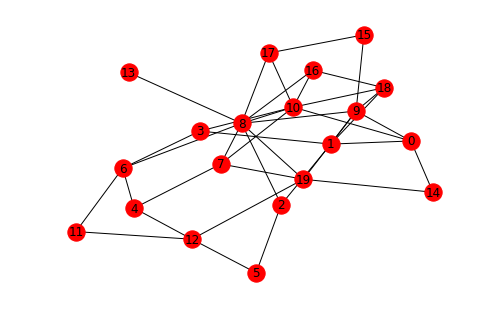

In [32]:
# draw the graph using nx.draw and with labels
nx.draw_spring(G, with_labels=True)

#### Hubs: How do we find connections between nodes?

In [33]:
# find the number of neighbors of a node
list(G.neighbors(12))

[4, 5, 11, 19]

In [34]:
# find the degree centrality of first 5 nodes in the network (significance of every node on one node)
nx.degree_centrality(G)

{0: 0.21052631578947367,
 1: 0.2631578947368421,
 2: 0.15789473684210525,
 3: 0.15789473684210525,
 4: 0.15789473684210525,
 5: 0.10526315789473684,
 6: 0.21052631578947367,
 7: 0.21052631578947367,
 8: 0.47368421052631576,
 9: 0.3157894736842105,
 10: 0.3684210526315789,
 11: 0.10526315789473684,
 12: 0.21052631578947367,
 13: 0.05263157894736842,
 14: 0.10526315789473684,
 15: 0.10526315789473684,
 16: 0.15789473684210525,
 17: 0.15789473684210525,
 18: 0.21052631578947367,
 19: 0.2631578947368421}

#### Real-World Example of Neighbors

In [35]:
# Import and create a networkx graph from Arxiv GR-QC (General Relativity and Quantum Cosmology)
# collaboration network.

import csv
authors_graph = nx.Graph()
with open('CA-GrQc.txt', 'r') as f:
    reader = csv.reader(f, delimiter='\t')
    for row in reader:
        authors_graph.add_edge(row[0], row[1])

In [36]:
# print the number of nodes and edges of this network
print(authors_graph.number_of_edges())
print(authors_graph.number_of_nodes())

14496
5242


In [37]:
# Print the neighbors of a node and print the degree of the node using len() and nx.degree()
print(len(list(authors_graph.neighbors('22504'))))
print(nx.degree(authors_graph, ['22504']))
print(authors_graph.degree(['22504']))

33
[('22504', 33)]
[('22504', 33)]


----
## Exercise 3

Create a list of (node, degree of node) tuples and find the node with maximum degree.

In [50]:
nx.degree_centrality(authors_graph)
#authors_graph.degree()

results = [(node, len(list(authors_graph.neighbors(node)))) for node in authors_graph.nodes()]

max(result, key=lambda node[1])

SyntaxError: invalid syntax (<ipython-input-50-1bd395db49ea>, line 6)

In [51]:
authors_graph.degree()

DegreeView({'3466': 8, '937': 5, '5233': 2, '8579': 5, '10310': 13, '15931': 10, '17038': 17, '18720': 3, '19607': 4, '1854': 8, '4583': 3, '9572': 34, '10841': 7, '13056': 10, '14982': 2, '16310': 17, '19640': 25, '23855': 8, '24372': 1, '24814': 21, '5052': 29, '899': 3, '1796': 2, '2287': 14, '3096': 12, '3386': 11, '4472': 4, '5346': 20, '5740': 1, '6094': 4, '6376': 2, '9124': 24, '10235': 13, '10427': 8, '10597': 6, '15159': 4, '16148': 18, '16741': 7, '18235': 1, '18549': 1, '19297': 16, '20511': 32, '20595': 9, '20613': 10, '24371': 22, '24559': 23, '24731': 1, '25102': 7, '25271': 16, '25396': 23, '1658': 6, '4822': 2, '6864': 2, '7689': 32, '7926': 9, '10268': 7, '12971': 1, '18600': 4, '20421': 3, '20886': 2, '21048': 6, '22393': 5, '23186': 6, '23214': 4, '23298': 2, '23945': 3, '24939': 3, '339': 30, '624': 17, '3731': 9, '4743': 25, '5407': 9, '6610': 68, '6700': 31, '8045': 15, '9099': 9, '9639': 31, '9785': 68, '12141': 5, '15184': 13, '15784': 11, '18719': 22, '19870':

In [52]:
nx.degree_centrality(authors_graph)

{'3466': 0.0015264262545315779,
 '937': 0.0009540164090822362,
 '5233': 0.00038160656363289447,
 '8579': 0.0009540164090822362,
 '10310': 0.002480442663613814,
 '15931': 0.0019080328181644724,
 '17038': 0.003243655790879603,
 '18720': 0.0005724098454493417,
 '19607': 0.0007632131272657889,
 '1854': 0.0015264262545315779,
 '4583': 0.0005724098454493417,
 '9572': 0.006487311581759206,
 '10841': 0.0013356229727151307,
 '13056': 0.0019080328181644724,
 '14982': 0.00038160656363289447,
 '16310': 0.003243655790879603,
 '19640': 0.004770082045411181,
 '23855': 0.0015264262545315779,
 '24372': 0.00019080328181644724,
 '24814': 0.0040068689181453915,
 '5052': 0.00553329517267697,
 '899': 0.0005724098454493417,
 '1796': 0.00038160656363289447,
 '2287': 0.0026712459454302615,
 '3096': 0.0022896393817973667,
 '3386': 0.0020988360999809196,
 '4472': 0.0007632131272657889,
 '5346': 0.003816065636328945,
 '5740': 0.00019080328181644724,
 '6094': 0.0007632131272657889,
 '6376': 0.00038160656363289447,

----
## Exercise 4

Plot degree centrality of authors_graph & various other graph generators.

(count vs degree centrality)

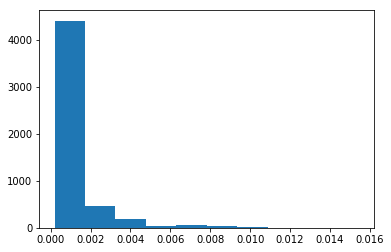

In [63]:
plt.hist(list(nx.degree_centrality(authors_graph).values()))
plt.show()

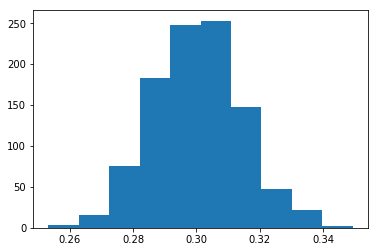

In [64]:
G = nx.erdos_renyi_graph(1000, 0.3, seed=1)
plt.hist(list(nx.degree_centrality(G).values()))
plt.show()

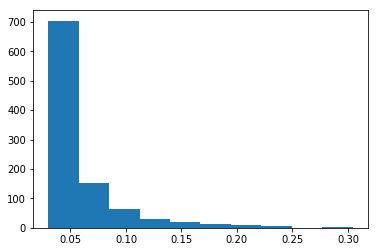

In [65]:
H = nx.barabasi_albert_graph(1000, 30, 0.3)
plt.hist(list(nx.degree_centrality(H).values()))
plt.show()

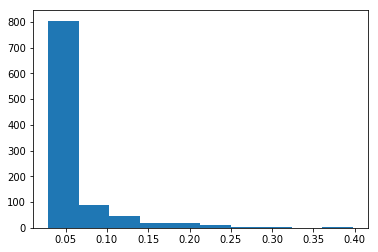

In [66]:
K = nx.powerlaw_cluster_graph(1000, 30, 0.3)
plt.hist(list(nx.degree_centrality(K).values()))
plt.show()

### Let's have a look at Connected Components of a graph.

In graph theory, a connected component (or just component) of an undirected graph is a subgraph in which any two vertices are connected to each other by paths, and which is connected to no additional vertices in the supergraph.

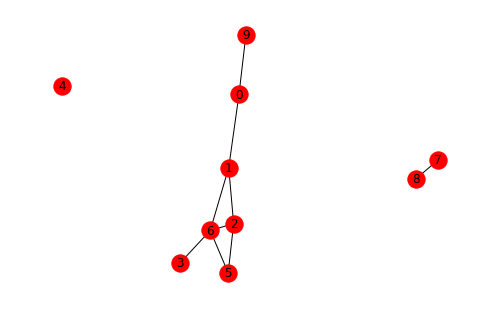

In [68]:
# This is a bad example of a network since nodes are disconnected
G = nx.erdos_renyi_graph(10, 0.15, seed=1)
nx.draw(G, with_labels=True)

In [70]:
# Connected components of a graph.
print([len(c) for c in sorted(nx.connected_components(authors_graph), key=len, reverse=True)])

[4158, 14, 12, 10, 9, 9, 8, 8, 8, 8, 8, 8, 7, 7, 7, 7, 7, 7, 7, 7, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 

In [71]:
# Connected component subgraphs of a graph. Returns a generator of subgraphs.
graphs = [c for c in sorted(nx.connected_component_subgraphs(authors_graph), key=len, reverse=True)]

In [72]:
len(graphs[10])

8

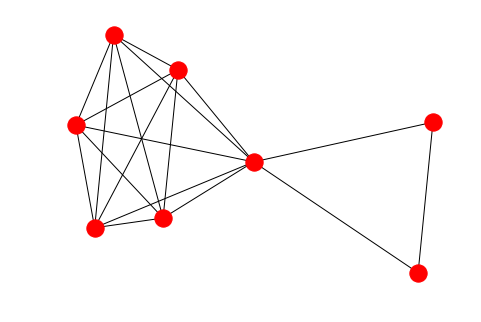

In [73]:
nx.draw(graphs[10])

----
## Exercise 6
This demonstrates Graph Traversal (Indexing the nodes between two edges)

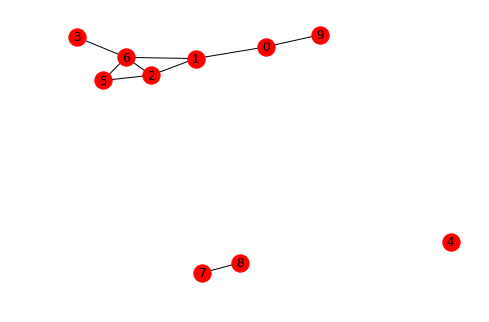

In [74]:
nx.draw(nx.erdos_renyi_graph(10, 0.15, seed=1), with_labels=True)

In [75]:
print(nx.shortest_path(graphs[0], '22504', '23991'))
print(len(nx.shortest_path(graphs[0], '22504', '23991')))
print(nx.shortest_path_length(graphs[0], '22504', '23991'))

['22504', '6512', '18757', '2710', '3677', '23991']
6
5


----
## Exercise 7
##### Six degrees of separation, Erdos Number, Bacon Number!!

Find the '22504' number of the graph G, if there is no connection between nodes then give it the number `-1`.
Also plot a histogram of the '22504' number.

Find the average shortest path length in the first component i.e. graphs[0]


HINT: `nx.shortest_path_length`

In [76]:
G = nx.fast_gnp_random_graph(10000, 0.1, seed=1)

In [77]:
d = {}
for node in authors_graph.nodes():
    try:
        d[node] = nx.shortest_path_length(authors_graph, '22504', node)
    except:
        d[node] = -1

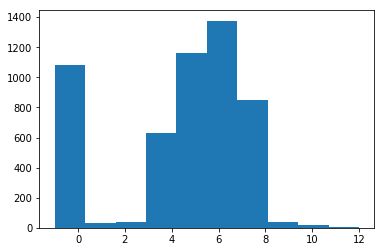

In [78]:
plt.hist(list(d.values()))
plt.show()

In [79]:
print(sum([1 for _, val in d.items() if val == -1]))
print(len(authors_graph.nodes()) - len(graphs[0]))
print((sum(val for _, val in d.items() if val != -1))/len(graphs[0]))

1084
1084
5.61014911014911


### Directed Graphs
![title](images/pagerank.png)

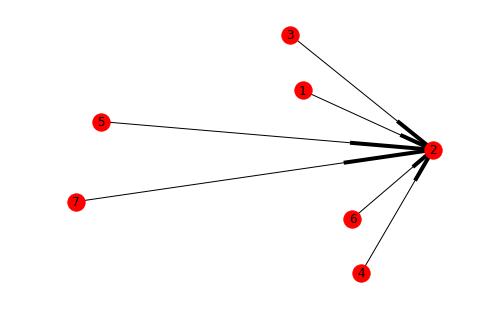

In [82]:
# Create a DiGraph object and add edges to it to make a star graph.
G = nx.DiGraph()
G.add_edges_from([(1, 2), (3, 2), (4, 2), (5, 2), (6, 2), (7, 2)])
nx.draw(G, with_labels=True)

### Effects of adding new Edges

In [83]:
G.in_degree()

nx.pagerank(G)

{1: 0.0826448180198328,
 2: 0.5041310918810031,
 3: 0.0826448180198328,
 4: 0.0826448180198328,
 5: 0.0826448180198328,
 6: 0.0826448180198328,
 7: 0.0826448180198328}

{1: 0.08024854052495894,
 2: 0.4844028780560986,
 3: 0.08024854052495894,
 4: 0.08024854052495894,
 5: 0.08024854052495894,
 6: 0.11435441931910648,
 7: 0.08024854052495894}

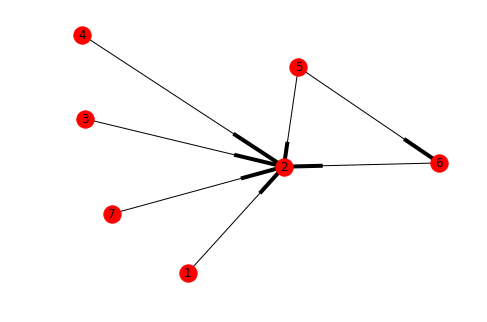

In [85]:
G.add_edge(5, 6)
nx.draw(G, with_labels=True)
nx.pagerank(G)

{1: 0.05378612718073915,
 2: 0.3246687852772877,
 3: 0.05378612718073915,
 4: 0.05378612718073915,
 5: 0.05378612718073915,
 6: 0.0766454192258098,
 7: 0.05378612718073915,
 8: 0.3297551595932067}

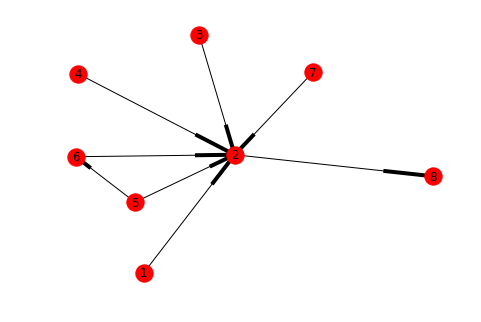

In [86]:
G.add_edge(2, 8)
nx.draw(G, with_labels=True)
nx.pagerank(G)